## Random exploration - we will clean it up later

In [32]:
import os
import pandas as pd
from read_data import read_csv
from tqdm import tqdm
import numpy as np

Let's merge all the dataframes in one single dataframe called `X_trains`

In [28]:
# Merge all dataframes
dir = './data/Train/Train'
files = os.listdir(dir)
dataframes = []

for file in files:
    if os.path.splitext(file)[-1] == '.csv':
        abs_path = os.path.join(dir, file)
        data = pd.read_csv(abs_path)
        dataframes.append(data)

X_trains = pd.concat(dataframes)

Let's convert the days of the week into integers:

In [ ]:
days = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
X_trains['weekday'] = [days[x] for x in X_trains['weekday']]
X_trains_dropna = X_trains.dropna()

### Correlation matrix

<AxesSubplot:>

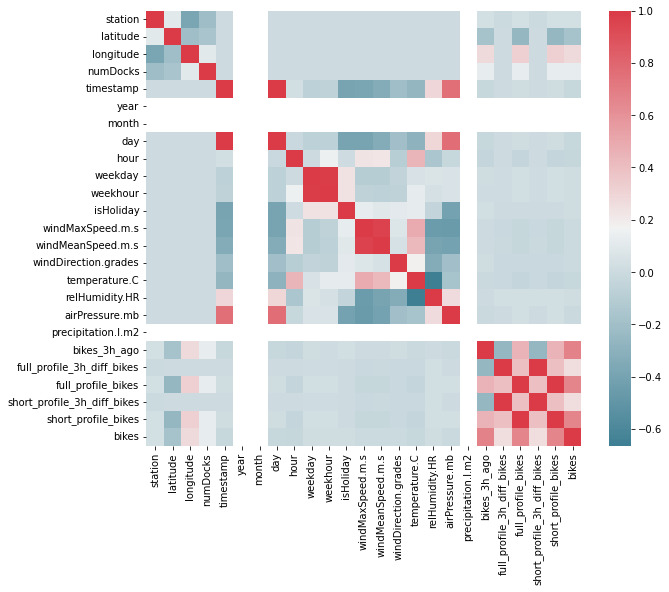

In [38]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = X_trains_dropna.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)